In [1280]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import LogNorm


In [1281]:
ix=[]
N_meas=6
count=0
for i in range(N_meas):
    for j in range(i, N_meas):
        for k in range(j, N_meas):
            if (i>0) and (i<5) and (j>0) and (j<5) and (k>0) and (k<5):
                ix.append(count)
            count+=1

print(ix)

[21, 22, 23, 24, 26, 27, 28, 30, 31, 33, 36, 37, 38, 40, 41, 43, 46, 47, 49, 52]


In [1282]:
ssc=np.loadtxt("../../../OneDrive/1_Work/5_Projects/02_3ptStatistics/Map3_Covariances/Takahashi/SSC_cov_square_term7Numerical_sigma_0.37_n_22209.47_thetaMax_29.32_gpu.dat")

T7=np.loadtxt("../../../OneDrive/1_Work/5_Projects/02_3ptStatistics/Map3_Covariances/Takahashi/cov_infinite_term7Numerical_sigma_0.37_n_22209.47_thetaMax_29.32_gpu.dat")
T1=np.loadtxt("../../../OneDrive/1_Work/5_Projects/02_3ptStatistics/Map3_Covariances/Takahashi/cov_infinite_term1Numerical_sigma_0.37_n_22209.47_thetaMax_29.32_gpu.dat")
T2=np.loadtxt("../../../OneDrive/1_Work/5_Projects/02_3ptStatistics/Map3_Covariances/Takahashi/cov_square_term2Numerical_sigma_0.37_n_22209.47_thetaMax_29.32_gpu.dat")
T4=np.loadtxt("../../../OneDrive/1_Work/5_Projects/02_3ptStatistics/Map3_Covariances/Takahashi/cov_infinite_term4Numerical_sigma_0.37_n_22209.47_thetaMax_29.32_gpu.dat")
T5=np.loadtxt("../../../OneDrive/1_Work/5_Projects/02_3ptStatistics/Map3_Covariances/Takahashi/cov_infinite_term5Numerical_sigma_0.37_n_22209.47_thetaMax_29.32_gpu.dat")
T6=np.loadtxt("../../../OneDrive/1_Work/5_Projects/02_3ptStatistics/Map3_Covariances/Takahashi/cov_square_term6Numerical_sigma_0.37_n_22209.47_thetaMax_29.32_gpu.dat")



#ix=[21, 22, 23, 26, 27, 30, 36, 37, 40, 46]
sim=np.load("../../../OneDrive/1_Work/5_Projects/02_3ptStatistics/Map3_Covariances/Takahashi/Map_cov_KiDS1000_squarepatches_0.npy")[6:, 6:]
err=np.load("../../../OneDrive/1_Work/5_Projects/02_3ptStatistics/Map3_Covariances/Takahashi/Map_cov_KiDS1000_bootstrap_std.npy")[6:, 6:]

sim=sim[ix,:][:,ix]
err=err[ix,:][:,ix]*2
tot=T1+T2+T4+T5+T6+T7

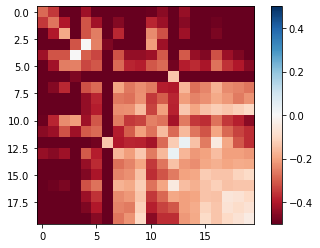

In [1283]:
plt.imshow(2*(tot-sim)/(tot+sim), vmin=-0.5, vmax=0.5, cmap='RdBu')
plt.colorbar()

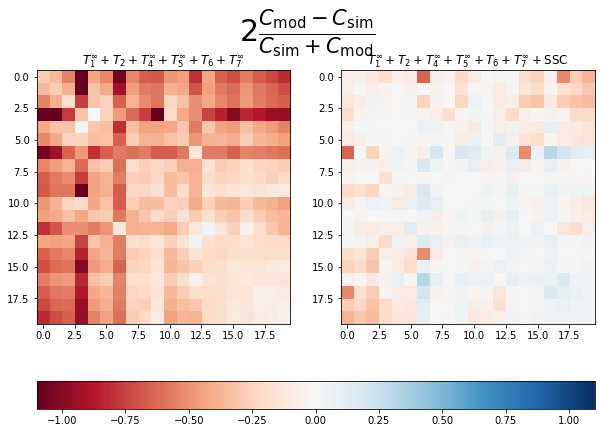

In [1284]:
fig,ax=plt.subplots(ncols=2, figsize=(10,7))
fig.suptitle(r"$2\frac{C_\mathrm{mod}-C_\mathrm{sim}}{C_\mathrm{sim}+C_\mathrm{mod}}$",size=30)
ax[0].set_title(r"$T_1^\infty+T_2+T_4^\infty+T_5^\infty+T_6+T_7^\infty$")
im=ax[0].imshow(2*(tot-sim)/(tot+sim), vmin=-1.1, vmax=1.1, cmap='RdBu')
ax[1].set_title(r"$T_1^\infty+T_2+T_4^\infty+T_5^\infty+T_6+T_7^\infty+$SSC")

im=ax[1].imshow(2*(tot+ssc-sim)/(tot+ssc+sim), vmin=-1.1, vmax=1.1, cmap='RdBu')

fig.colorbar(im, ax=ax.ravel(), orientation='horizontal')

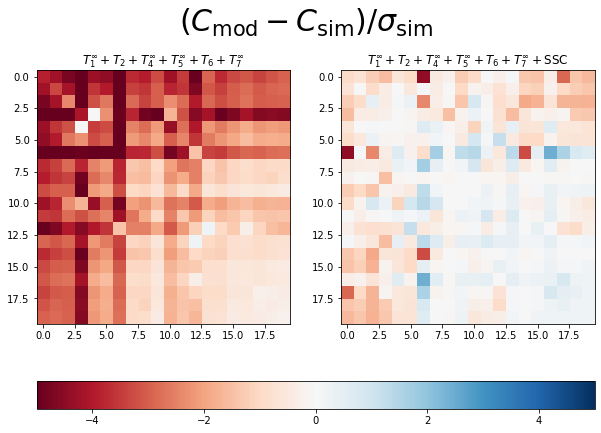

In [1285]:
fig,ax=plt.subplots(ncols=2, figsize=(10, 7))
fig.suptitle(r"$(C_\mathrm{mod}-C_\mathrm{sim})/\sigma_\mathrm{sim}$",size=30)
ax[0].set_title(r"$T_1^\infty+T_2+T_4^\infty+T_5^\infty+T_6+T_7^\infty$")
ax[1].set_title(r"$T_1^\infty+T_2+T_4^\infty+T_5^\infty+T_6+T_7^\infty+$SSC")

im=ax[0].imshow((tot-sim)/err, vmin=-5, vmax=5, cmap='RdBu')
im=ax[1].imshow((tot+ssc-sim)/err, vmin=-5, vmax=5, cmap='RdBu')

fig.colorbar(im, ax=ax.ravel(), orientation='horizontal')